In [1]:
### get image quality score 
### Author: Hervind

In [2]:
import numpy as np
import cv2

import datetime as dt
import os
from sklearn.externals import joblib

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import urllib2

In [3]:
def image_colorfulness(img):
    (B, G, R) = cv2.split(img.astype("float"))
    rg = np.absolute(R - G)
    yb = np.absolute(0.5 * (R + G) - B)
    (rbMean, rbStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
    colorfulness = stdRoot + (0.3 * meanRoot)
    return colorfulness

In [4]:
def get_properties(img):
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   
    
    luminance = img_gray.mean()
    
    gy, gx = np.gradient(img_gray)
    gnorm = gx**2 + gy**2
    sharpness = np.average(gnorm)
    
    dist_pixel = len(np.unique([str(x) for x in img.reshape(-1, 3).tolist()]))

    blur = cv2.Laplacian(img, cv2.CV_64F).var()
    
    saturation = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:,:,1].mean()
    
    
    red   = img[:,:,2].mean()
    green = img[:,:,1].mean()
    blue  = img[:,:,0].mean()
    
    color = image_colorfulness(img)
    
    return dist_pixel, blur, sharpness, saturation, luminance, red, green, blue, color

In [5]:
def get_img_properties(img):
    
    if img.shape[1] > img.shape[0]: #rotate if landscape
        img = np.rot90(img)
    img = cv2.resize(img, (200, 300)) # resize with width = 200 , height = 300    
    
    al = img[:100, :65, :]; ac = img[:100, 65:130, :]; ar = img[:100, 130:, :]
    ml = img[100:200, :65, :]; mc = img[100:200, 65:130, :]; mr = img[100:200, 130:, :]
    bl = img[200:, :65, :]; bc = img[200:, 65:130, :]; br = img[200:, 130:, :]
    
    dist_pixel, blur, sharpness, saturation, luminance, red, green, blue, color = get_properties(img)
    
    al_dist_pixel, al_blur, al_sharpness, al_saturation, al_luminance, al_red, al_green, al_blue, al_color = get_properties(al)
    ac_dist_pixel, ac_blur, ac_sharpness, ac_saturation, ac_luminance, ac_red, ac_green, ac_blue, ac_color = get_properties(ac)
    ar_dist_pixel, ar_blur, ar_sharpness, ar_saturation, ar_luminance, ar_red, ar_green, ar_blue, ar_color = get_properties(ar)

    ml_dist_pixel, ml_blur, ml_sharpness, ml_saturation, ml_luminance, ml_red, ml_green, ml_blue, ml_color = get_properties(ml)
    mc_dist_pixel, mc_blur, mc_sharpness, mc_saturation, mc_luminance, mc_red, mc_green, mc_blue, mc_color = get_properties(mc)
    mr_dist_pixel, mr_blur, mr_sharpness, mr_saturation, mr_luminance, mr_red, mr_green, mr_blue, mr_color = get_properties(mr)

    bl_dist_pixel, bl_blur, bl_sharpness, bl_saturation, bl_luminance, bl_red, bl_green, bl_blue, bl_color = get_properties(bl)
    bc_dist_pixel, bc_blur, bc_sharpness, bc_saturation, bc_luminance, bc_red, bc_green, bc_blue, bc_color = get_properties(bc)
    br_dist_pixel, br_blur, br_sharpness, br_saturation, br_luminance, br_red, br_green, br_blue, br_color = get_properties(br)
    
    return [dist_pixel, blur, sharpness, saturation, luminance, red, green, blue, color,
            al_dist_pixel, al_blur, al_sharpness, al_saturation, al_luminance, al_red, al_green, al_blue, al_color,
            ac_dist_pixel, ac_blur, ac_sharpness, ac_saturation, ac_luminance, ac_red, ac_green, ac_blue, ac_color,
            ar_dist_pixel, ar_blur, ar_sharpness, ar_saturation, ar_luminance, ar_red, ar_green, ar_blue, ar_color,
            ml_dist_pixel, ml_blur, ml_sharpness, ml_saturation, ml_luminance, ml_red, ml_green, ml_blue, ml_color,
            mc_dist_pixel, mc_blur, mc_sharpness, mc_saturation, mc_luminance, mc_red, mc_green, mc_blue, mc_color,
            mr_dist_pixel, mr_blur, mr_sharpness, mr_saturation, mr_luminance, mr_red, mr_green, mr_blue, mr_color,
            bl_dist_pixel, bl_blur, bl_sharpness, bl_saturation, bl_luminance, bl_red, bl_green, bl_blue, bl_color,
            bc_dist_pixel, bc_blur, bc_sharpness, bc_saturation, bc_luminance, bc_red, bc_green, bc_blue, bc_color,
            br_dist_pixel, br_blur, br_sharpness, br_saturation, br_luminance, br_red, br_green, br_blue, br_color] 

In [6]:
def show_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.imshow(img)
    fig.set_cmap('hot')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
#     plt.show()

In [7]:
model = joblib.load('model_image_q.pkl')

In [8]:
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib2.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # return the image
    return image

In [9]:
def score_from_url(url):
    image = url_to_image(url)
    img_property = get_img_properties(image)
    score = int(model.predict_proba(img_property)[0,1] * 100)
    show_image(image)
    print "Score: {} / 100 ".format(score)

Score: 99 / 100 


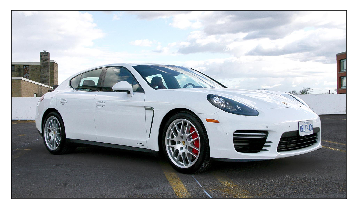

In [10]:
URL = 'https://cdntdreditorials.azureedge.net/cache/3/4/8/b/b/4/348bb4e97e86efa639c0abfd72da6877cd5a447b.jpg' 

score_from_url(URL)

Score: 0 / 100 


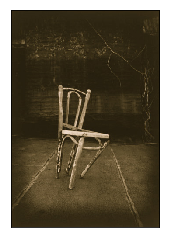

In [11]:
URL = 'https://sunnysuman.files.wordpress.com/2011/09/broken-chair.jpg'

score_from_url(URL)

Score: 58 / 100 


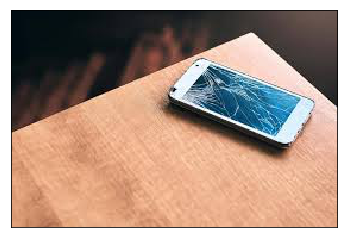

In [12]:
URL = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKOvrq08jFdcguLxOrFPLqwWvLZQByGTstyRTacU91Fi7TelW4nA' 

score_from_url(URL)